<a href="https://colab.research.google.com/github/sewon-x/Python/blob/master/%EA%B3%BC%EC%A0%9C3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
(train_images,train_labels),(test_images, test_labels)= datasets.mnist.load_data()

#print(train_images.shape)

train_images=train_images.reshape((60000,28, 28, 1))
test_images=test_images.reshape((10000,28, 28, 1))

train_images, test_images=train_images/255.0, test_images/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()
                  


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 67s 11ms/step - loss: 0.0642 - accuracy: 0.9801
Epoch 2/10
6000/6000 [==============================] - 67s 11ms/step - loss: 0.0388 - accuracy: 0.9875
Epoch 3/10
6000/6000 [==============================] - 66s 11ms/step - loss: 0.0302 - accuracy: 0.9910
Epoch 4/10
6000/6000 [==============================] - 66s 11ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 5/10
6000/6000 [==============================] - 66s 11ms/step - loss: 0.0188 - accuracy: 0.9942
Epoch 6/10
6000/6000 [==============================] - 66s 11ms/step - loss: 0.0160 - accuracy: 0.9950
Epoch 7/10
6000/6000 [==============================] - 66s 11ms/step - loss: 0.0139 - accuracy: 0.9960
Epoch 8/10
6000/6000 [==============================] - 66s 11ms/step - loss: 0.0135 - accuracy: 0.9962
Epoch 9/10
6000/6000 [==============================] - 66s 11ms/step - loss: 0.0122 - accuracy: 0.9964
Epoch 10/10
6000/6000 [==============================] - 66s 11m

Epoch 1/10
2813/2813 [==============================] - 50s 18ms/step - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.0057 - val_accuracy: 0.9981
Epoch 2/10
2813/2813 [==============================] - 50s 18ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0043 - val_accuracy: 0.9989
Epoch 3/10
2813/2813 [==============================] - 50s 18ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0157 - val_accuracy: 0.9961
Epoch 4/10
2813/2813 [==============================] - 51s 18ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.0109 - val_accuracy: 0.9967
Epoch 5/10
2813/2813 [==============================] - 50s 18ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0200 - val_accuracy: 0.9953
Epoch 6/10
2813/2813 [==============================] - 51s 18ms/step - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.0150 - val_accuracy: 0.9968
Epoch 7/10
2813/2813 [==============================] - 52s 18ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0133 -

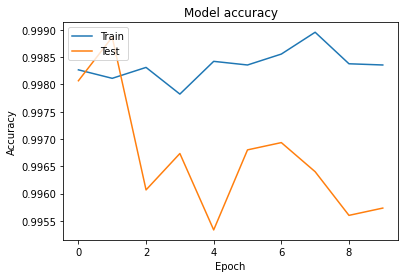

In [ ]:
import matplotlib.pyplot as plt
history=model.fit(train_images, train_labels, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

#학습 정확성 값과 검증 정확성 값을 플롯팅 합니다.
print(history)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [ ]:
# 구글드라이브 마운트 코딩
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.0759 - accuracy: 0.9907
